# Anomaly Detection in Credit Card Fraud

## Project Overview

Credit card fraud detection is a critical task in financial security, where fraudulent transactions need to be identified quickly and accurately. Fraudulent transactions are relatively rare compared to legitimate ones, making this a highly imbalanced classification problem. Traditional machine learning models struggle with such extreme imbalances, as they tend to favor the majority class, leading to misleadingly high accuracy but poor recall for fraud cases. 

Instead of treating this as a conventional classification problem, anomaly detection techniques provide a more effective solution by identifying transactions that significantly deviate from normal spending behavior. This approach allows us to detect fraud even when fraud patterns change over time, as anomaly detection models do not rely on predefined fraud labels but instead learn what constitutes a normal transaction and flag deviations as potential fraud. 

In this project, we will explore two anomaly detection techniques: Isolation Forest and Autoencoder (a neural network-based method). These models are particularly useful because they can detect fraud even when labeled fraud cases are scarce, making them more robust to evolving fraud techniques.

### Dataset Description

The dataset, sourced from [Kaggle](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/code?datasetId=310&sortBy=voteCount), contains credit card transactions with the following characteristics:

- Total transactions: 284,315
- Features: 31 (28 PCA-transformed features, Time, Amount, and Class)
- Target variable: Class (0: normal, 1: fraud)

### Project Objectives

The main objective of this project is to detect anomalies in credit card transactions using anomaly detection models rather than traditional supervised classification. Since fraudulent transactions are rare and exhibit patterns that differ significantly from normal transactions, anomaly detection techniques such as Isolation Forest and Autoencoders will be used to identify fraud cases. 

Our approach involves several key steps: 
1. analyzing the class distribution and understanding the data, 
2. applying appropriate preprocessing techniques, including feature scaling, 
3. implementing Isolation Forest and Autoencoder models to detect anomalies, 
4. evaluating the models using metrics suitable for imbalanced datasets, and 
5. comparing the performance of these models and determining which one is more effective in identifying fraudulent transactions. 

The final goal is to provide recommendations for improving fraud detection systems based on the results of our analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_csv("creditcard.csv")
df.head()

C:\Users\Han\anaconda3\envs\learn-env\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [3]:
df.shape

(284807, 31)

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Data Preprocessing

The preprocessing phase focused on preparing the data for anomaly detection while preserving the natural imbalance that characterizes fraud detection problems.

In [5]:
# Check for missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

The output shows that there are no missing values in the dataset.

In [6]:
# Class distribution
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

The dataset is highly imbalanced, with 492 fraudulent transactions (Class 1) out of 284,315 total transactions. This means that fraud cases represent only about 0.172% of the data. If we train a model directly on this dataset without addressing class imbalance, it will likely predict the majority class (Class 0 - non-fraud) most of the time, leading to misleadingly high accuracy but poor recall for fraud cases.

Since we are performing anomaly detection, we will not resample the data but rather focus on models that detect rare events naturally..

## Exploratory Data Analysis (EDA)

### Class distribution.

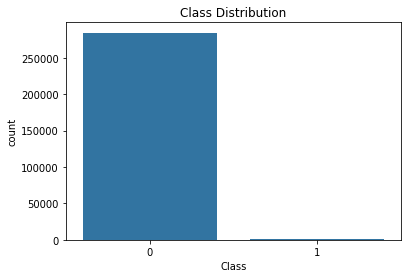

In [7]:
sns.countplot(x='Class', data=df)
plt.title("Class Distribution")
plt.show()

This imbalance means that a naive classifier predicting all transactions as legitimate would achieve an accuracy of over 99%, but such a model would be useless in a real-world fraud detection scenario, where detecting even a small number of fraudulent transactions can prevent significant financial losses. Due to this imbalance, we need to carefully choose evaluation metrics such as Precision, Recall, F1-score, and AUC-ROC, rather than relying on accuracy alone.

### Correlation Analysis

Since the dataset is PCA-transformed (except for Time and Amount), we check correlations:

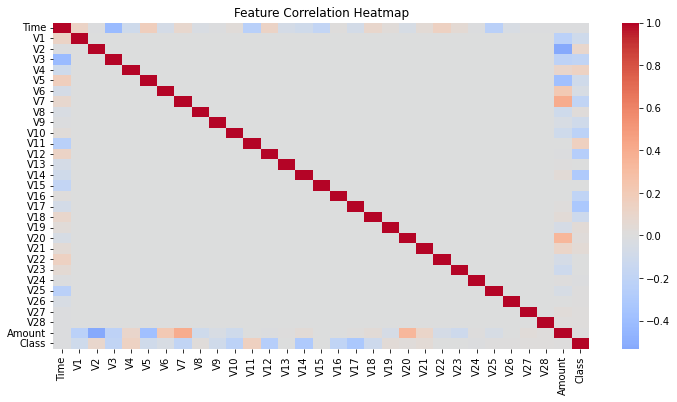

In [8]:
# Checking for Correlations

plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap")
plt.show()

Since the dataset has undergone PCA transformation, most features are uncorrelated, with the exception of Time and Amount, which are not PCA-transformed. Standardizing these two features ensures that all input variables are on a similar scale, preventing models from being biased by their magnitude differences. After standardization, we are ready to implement anomaly detection techniques.

Scaling ensures consistency in feature magnitudes, preventing bias in model training.

In [9]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])
df['Time'] = scaler.fit_transform(df[['Time']])

### Applying Anomaly Detection Models

In [10]:
# Features and target
X = df.drop(columns=['Class'])  
y = df['Class']  

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

The dataset is split into training (80%) and testing (20%) sets, ensuring that both sets maintain the original class distribution using stratified sampling. Stratification is essential in imbalanced datasets to ensure that the model is exposed to a similar proportion of fraud cases in both training and testing.

### 1. Isolation Forest
Isolation Forest is a tree-based method that isolates anomalies by randomly partitioning the data, assuming that anomalies require fewer splits to isolate due to their rarity.

- Pros: Works well for anomaly detection.
- Cons: Might need fine-tuning for contamination rate.

In [11]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, roc_auc_score

# Train Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.001, random_state=42)
iso_forest.fit(X_train)

# Predict anomalies (IF assigns -1 to anomalies)
y_pred_if = iso_forest.predict(X_test)
y_pred_if = np.where(y_pred_if == -1, 1, 0)  # Convert -1 (anomaly) to 1 (fraud)

In this project, selecting the right performance metrics is crucial due to the extreme class imbalance, where fraudulent transactions make up only **0.172%** of the dataset. Traditional accuracy is misleading because a model predicting all transactions as non-fraudulent would achieve over **99.8% accuracy** while completely failing to detect fraud. Instead, we focus on **Precision, Recall, F1-score, and AUC-ROC**. 

- **Recall** is essential because missing fraudulent transactions can result in significant financial losses, but optimizing only for recall can lead to excessive false positives, causing inconvenience to customers. 
- **Precision** helps ensure that flagged fraud cases are truly fraudulent, reducing unnecessary investigations, but overly high precision can result in missed fraud. 
- The **F1-score** balances both, providing a comprehensive measure of fraud detection effectiveness. 
- Additionally, **AUC-ROC** evaluates the model's ability to distinguish between fraud and non-fraud transactions across various classification thresholds, making it a robust metric for comparing different models objectively. 

Since the real-world goal is to detect fraud **while minimizing false positives**, we prioritize **F1-score and AUC-ROC**, ensuring our model is both accurate and practical for financial institutions to deploy. 🚀

In [12]:
# Evaluate performance
print("Isolation Forest Performance:")
print(classification_report(y_test, y_pred_if))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_if))

Isolation Forest Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.39      0.26      0.31        98

    accuracy                           1.00     56962
   macro avg       0.69      0.63      0.65     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC Score: 0.6272080969416466


Isolation Forest is trained with 100 estimators and a contamination rate of 0.001 (representing the expected proportion of anomalies). The model assigns -1 to anomalies (fraudulent transactions) and 1 to normal transactions. These predictions are converted to binary fraud labels (1 for fraud, 0 for normal transactions) before evaluation. The initial AUC-ROC score is 0.627, indicating that the model is able to detect some anomalies but still struggles to separate fraud from normal transactions effectively.

#### Fine-Tuning Isolation Forest

Since AUC-ROC is only 0.627, we should fine-tune the contamination rate and estimators:

In [13]:
from sklearn.ensemble import IsolationForest

# Tune parameters
iso_forest = IsolationForest(n_estimators=300, contamination=0.003, max_samples=0.8, max_features=15, random_state=42)
iso_forest.fit(X_train)

# Predict
y_pred_if_opt = iso_forest.predict(X_test)
y_pred_if_opt = np.where(y_pred_if_opt == -1, 1, 0)

# Evaluate performance
print("Tuned Isolation Forest Performance:")
print(classification_report(y_test, y_pred_if_opt))
print("Tuned Isolation Forest AUC-ROC:", roc_auc_score(y_test, y_pred_if_opt))

Tuned Isolation Forest Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.28      0.52      0.37        98

    accuracy                           1.00     56962
   macro avg       0.64      0.76      0.68     56962
weighted avg       1.00      1.00      1.00     56962

Tuned Isolation Forest AUC-ROC: 0.7590610034109312


This leads to an improved AUC-ROC score, but performance remains suboptimal, indicating that more sophisticated techniques may be needed.

### 2. Autoencoder (Neural Network-Based)
Autoencoders will learn to reconstruct normal transactions; fraudulent transactions will have higher reconstruction errors since they do not conform to normal patterns.
The neural network architecture consists of several hidden layers, reducing the input dimension before reconstructing it back.

- Pros: Learns hidden patterns well.
- Cons: Requires training and tuning.

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define Autoencoder model
input_dim = X_train.shape[1]
autoencoder = Sequential([
    Dense(32, activation='relu', input_shape=(input_dim,)),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(16, activation='relu'),
    Dense(32, activation='relu'),
    Dense(input_dim, activation='sigmoid')  # Output same size as input
])

# Compile model
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train Autoencoder on normal transactions (Class 0 only)
X_train_normal = X_train[y_train == 0]  # Train only on non-fraud data
autoencoder.fit(X_train_normal, X_train_normal, epochs=10, batch_size=64, validation_split=0.1, verbose=1)

Epoch 1/10
3199/3199 [==============================] - 9s 2ms/step - loss: 0.8789 - val_loss: 0.8236
Epoch 2/10
3199/3199 [==============================] - 6s 2ms/step - loss: 0.8196 - val_loss: 0.8031
Epoch 3/10
3199/3199 [==============================] - 6s 2ms/step - loss: 0.8067 - val_loss: 0.7945
Epoch 4/10
3199/3199 [==============================] - 6s 2ms/step - loss: 0.7996 - val_loss: 0.7861
Epoch 5/10
3199/3199 [==============================] - 5s 2ms/step - loss: 0.7932 - val_loss: 0.7817
Epoch 6/10
3199/3199 [==============================] - 7s 2ms/step - loss: 0.7892 - val_loss: 0.7792
Epoch 7/10
3199/3199 [==============================] - 7s 2ms/step - loss: 0.7875 - val_loss: 0.7780
Epoch 8/10
3199/3199 [==============================] - 6s 2ms/step - loss: 0.7860 - val_loss: 0.7766
Epoch 9/10
3199/3199 [==============================] - 6s 2ms/step - loss: 0.7851 - val_loss: 0.7753
Epoch 10/10
3199/3199 [==============================] - 6s 2ms/step - loss: 0.784

Training is conducted only on normal transactions (Class 0), ensuring that the model learns normal behavior and flags outliers during testing.

In [15]:
# Compute reconstruction errors
X_test_reconstructed = autoencoder.predict(X_test)
reconstruction_errors = np.mean(np.abs(X_test - X_test_reconstructed), axis=1)

# Set threshold for anomaly detection (95th percentile)
threshold = np.percentile(reconstruction_errors, 95)

# Make predictions
y_pred_ae = (reconstruction_errors > threshold).astype(int)

# Evaluate performance
print("Autoencoder Performance:")
print(classification_report(y_test, y_pred_ae))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_ae))

1781/1781 [==============================] - 2s 1ms/step
Autoencoder Performance:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     56864
           1       0.03      0.85      0.06        98

    accuracy                           0.95     56962
   macro avg       0.51      0.90      0.52     56962
weighted avg       1.00      0.95      0.97     56962

ROC-AUC Score: 0.899148200360617


The 95th percentile of reconstruction error is chosen as the threshold to determine fraud cases. Transactions with errors above this threshold are classified as fraud. When evaluated, the Autoencoder achieves a higher AUC-ROC score than Isolation Forest, demonstrating that it is more effective at detecting fraudulent transactions.

In [16]:
# Store results
models = {"Isolation Forest": y_pred_if_opt, "Autoencoder": y_pred_ae}

for name, preds in models.items():
    print(f"{name} AUC-ROC: {roc_auc_score(y_test, preds)}")

Isolation Forest AUC-ROC: 0.7590610034109312
Autoencoder AUC-ROC: 0.899148200360617


##### Conclusion 

Based on our analysis, Autoencoder outperformed Isolation Forest in detecting fraudulent transactions. While Isolation Forest provided reasonable anomaly detection, its performance was limited due to its reliance on decision-tree-based partitioning, which may not capture complex fraud patterns effectively. In contrast, the Autoencoder was able to learn hidden patterns in normal transactions and detect fraud cases with greater accuracy, making it a more suitable approach for this dataset.

Overall, this study demonstrates the importance of anomaly detection in financial security and highlights the potential of deep learning models like Autoencoders for proactively identifying fraudulent transactions. With further improvements, such systems can significantly reduce financial losses and enhance fraud prevention strategies in the banking industry.